<a href="https://colab.research.google.com/github/wajahattt-dot/PIAIC-Q2-Notes-Wajahat-Hussain/blob/main/Class%2003%20Q2%20Batch%20%2061/PIAIC_Class_03_Q2_B61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PIAIC BATCH 61 CLASS 03 Q2**
*Managed and Created By: Wajahat Hussain*

Practice for the class of GenAI

Topics:

1. Installing Google Gemini in Google Colab (Python SDK)
2.  Using images in Google Colab to get response from the Generatuve AI model
3. Specifying History In Colab
4. Specifying Tokens And Temperature To Maintain Efficiency

First we will install Google Generative AI model (Python SDK)
to access the intelligence and develop in Python

In [1]:
!pip install -U -q "google-generativeai>=0.7.2" # Install the Python SDK

Next we will import GenAI from Google

In [2]:
import google.generativeai as genai

We will provide access of the API key to use the Gemini Model

We can generate new API key through Google AI Studio

In [3]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [24]:
model = genai.GenerativeModel('gemini-2.0-flash-exp')
response = model.generate_content("Give me python code to sort a list")
print(response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Okay, here's Python code demonstrating various ways to sort a list, along with explanations of each:\n\n**1. Using the `sort()` Method (In-Place Modification)**\n\n   - The `sort()` method directly modifies the original list.\n   - It sorts the list in ascending order by default.\n   - You can use `reverse=True` for descending order.\n\n   ```python\n   my_list = [5, 2, 8, 1, 9, 4]\n\n   # Ascending order (in-place modification)\n   my_list.sort()\n   print(\"Ascending (sort()):\", my_list)  # Output: Ascending (sort()): [1, 2, 4, 5, 8, 9]\n\n   # Descending order (in-place modification)\n   my_list.sort(reverse=True)\n   print(\"Descending (sort()):\", my_list) # Output: Descending (sort()): [9, 8, 5, 4, 2, 1] \n\n   # Reset my_list to show the next example

In [5]:
response.usage_metadata.candidates_token_count

824

## Use images in your prompt

Here you will download an image from a URL and pass that image in our prompt.

First, you download the image and load it with PIL:

In [6]:
!curl -o image.jpg "https://robbreport.com/wp-content/uploads/2021/07/1-15.jpg?w=1000"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  231k  100  231k    0     0   876k      0 --:--:-- --:--:-- --:--:--  877k


Then you open the image

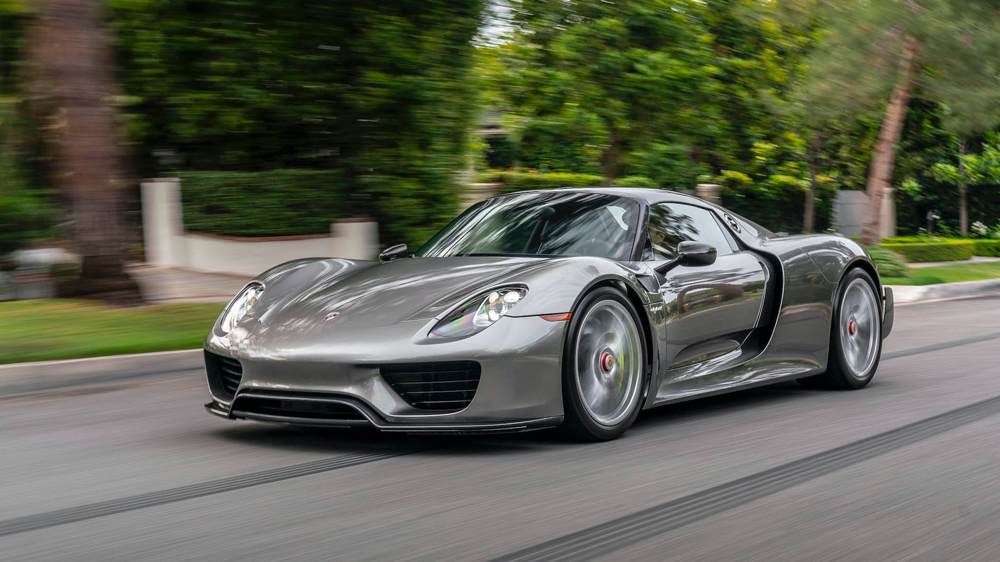

In [7]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

Providing prompt for Gemini Chatbot Model 1.5 Flash

In [22]:
prompt = """This image contains an image  of a potential product.
Given the product image, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

Generating the response by the help of AI

In [23]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content([prompt, img])
print(response.text)

```json
{
  "description": "The image shows a silver Porsche 918 Spyder, a high-performance hybrid sports car, driving on a road. It's a two-seater coupe with a sleek, aerodynamic design.  The car appears to be in motion, suggesting speed and performance.",
  "features": [
    "Porsche 918 Spyder model",
    "Silver exterior color",
    "Two-seater coupe body style",
    "Aerodynamic design",
    "High-performance capabilities",
    "Hybrid powertrain (implied)",
    "Large alloy wheels",
    "Distinctive Porsche branding"
  ]
}
```


### Statleless Model
 Gemini Model Doesnt Memorize or Store Our Information Except within the prompt.
 For Instance:

In [13]:
model= genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content("My name is Wajahat")
print(response.text)

response = model.generate_content("My name is?")
print(response.text)

It's nice to meet you, Wajahat.  Is there anything I can help you with today?

I do not know your name.  I have no access to personal information about you unless you explicitly provide it.



Now we specify it to store our history so it can generate responses according to our background it knows about us

In [14]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

As it stores our information now, we can ask regarding to the background about which we asked from it

In [15]:
response = chat.send_message("Hi my name is Wajahat")
print(response.text)
response = chat.send_message("What is my name?")
print(response.text)

It's nice to meet you, Wajahat!  How can I help you today?

Your name is Wajahat.



We can see the chat history by

In [16]:
print(chat.history)

[parts {
  text: "Hi my name is Wajahat"
}
role: "user"
, parts {
  text: "It\'s nice to meet you, Wajahat!  How can I help you today?\n"
}
role: "model"
, parts {
  text: "What is my name?"
}
role: "user"
, parts {
  text: "Your name is Wajahat.\n"
}
role: "model"
]


## Specifying Tokens And Temperature
Every prompt you send to the model includes parameters that control how the model generates responses. Use a `genai.GenerationConfig` to set these, or omit it to use the defaults.

Temperature controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

You can set the `generation_config` when creating the model.

In [19]:
model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=20,
        temperature=0.9,
    ))

## Specifying the number of lines
Or, set the `generation_config` on an individual call to `generate_content`. Any values set there override values on the model constructor.

Note: Although you can set the `candidate_count` in the generation_config, gemini-pro models will only return a single candidate at the this time.

In [28]:
response = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = genai.GenerationConfig(stop_sequences=['\n6'])
)

In [29]:
print(response.text)

Okay, here's a numbered list of fascinating cat facts:

1.  **Cats can make over 100 different sounds,** while dogs can only make about 10.

2.  **A cat's purr vibrates at a frequency of 25 to 150 Hertz,** which is believed to have therapeutic properties and can even promote bone healing.

3.  **Cats have a third eyelid,** called a nictitating membrane, that helps keep their eyes moist and protected.

4. **A cat's nose print is unique,** just like human fingerprints.

5. **Cats can jump up to six times their height.**

